In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import numpy
import pandas
from PIL import Image
import random
import xarray as xr

In [2]:
Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Data/Output_Files_V6/'
NetCDF_Diri = '/glade/derecho/scratch/whimkao/NetCDF_Files_V6/'
Output_Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Github/RCP_Figs/Analysis_Figs_V6.6.3/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri, Subset):
    Data_DF = Open_File(Diri+Model+'_Data_'+Subset+'_Output_V6.csv')
    ET_DF = Open_File(Diri+Model+'_ET_'+Subset+'_Output_V6.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output_V6.csv')
# Edit Time Format
    Time, Begin_Time, Compl_Time, Trop_Peak_Time, Peak_Time, Birth_Time = [], [], [], [], [], []
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Begin_Time.append(Datetime(ET_DF["ET Begin Time"][j]))
        Compl_Time.append(Datetime(ET_DF["ET Complete Time"][j]))
        Trop_Peak_Time.append(Datetime(ET_DF["Trop Peak Time"][j]))
        Peak_Time.append(Datetime(ET_DF["Peak Time"][j]))
        Birth_Time.append(Datetime(ET_DF["Genesis Time"][j]))
    Data_DF["Time(Z)"] = Time
    ET_DF["ET Begin Time"] = Begin_Time
    ET_DF["ET Complete Time"] = Compl_Time
    ET_DF["Trop Peak Time"] = Trop_Peak_Time
    ET_DF["Peak Time"] = Peak_Time
    ET_DF["Genesis Time"] = Birth_Time
    return (Data_DF, ET_DF, Codes_DF)

In [5]:
def Datetime(Time):
    try:
        New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    except:
        New_Time = numpy.nan
    return (New_Time)

In [6]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
Lat_Bins = Create_Bins(10,60,5)
Lon_Bins = Create_Bins(-100,20,5)

In [7]:
Num_Years = numpy.array([90,93,93])

In [8]:
# Function to Find Distance Between Two Points
def Find_Distance(y1, y2, x1, x2):
    Start_Lat = y1 * numpy.pi / 180
    End_Lat = y2 * numpy.pi / 180
    Start_Lon = x1 * numpy.pi / 180
    End_Lon = x2 * numpy.pi / 180
    Lat_Diff = End_Lat - Start_Lat
    Lon_Diff = End_Lon - Start_Lon
    Earth_Rad = 6378
    Distance = 2 * Earth_Rad * numpy.sqrt((numpy.sin(Lat_Diff/2))**2 + \
    numpy.cos(Start_Lat) * numpy.cos(End_Lat) * (numpy.sin(Lon_Diff/2))**2)
    return (Distance)

In [9]:
# Find a Specific Storm Within the DataFrame
def Find_Storm(DF, Code):
    DF_Storm = DF[DF["Code"] == Code].reset_index()
    return (DF_Storm)

In [10]:
Control_Data, Control_ET, Control_Codes = Files_Open("Control", Diri, "SubsetB")
RCP45_Data, RCP45_ET, RCP45_Codes = Files_Open("RCP45", Diri, "SubsetB")
RCP85_Data, RCP85_ET, RCP85_Codes = Files_Open("RCP85", Diri, "SubsetB")

In [11]:
Months_Name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jun-Aug', 'Sep-Nov', 'Dec-May', 'Annual']

In [12]:
# Create Function to Open Monthly Files
def Open_Monthly_File(Model):
    DS_Dict = {}
    for i in range(len(Months_Name)):
        File_Name = str(Model+'_Output_'+Months_Name[i]+'_V6.nc')
        Month_DS = xr.open_dataset(NetCDF_Diri + File_Name)
        DS_Dict[Months_Name[i]] = Month_DS
        print (i)
    return (DS_Dict)

In [13]:
# Open Monthly Files
Control_DS_Dict = Open_Monthly_File("Control")
RCP45_DS_Dict = Open_Monthly_File("RCP45")
RCP85_DS_Dict = Open_Monthly_File("RCP85")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [14]:
Control_DS_Dict['Sep-Nov']

<xarray.Dataset> Size: 2MB
Dimensions:  (plev: 13, lat: 61, lon: 101)
Coordinates:
  * lat      (lat) float64 488B 0.0 1.0 2.0 3.0 4.0 ... 56.0 57.0 58.0 59.0 60.0
  * lon      (lon) float64 808B -100.0 -99.0 -98.0 -97.0 ... -3.0 -2.0 -1.0 0.0
  * plev     (plev) float64 104B 1e+05 9.25e+04 8.5e+04 ... 1.5e+04 1e+04 5e+03
Data variables:
    T        (plev, lat, lon) float32 320kB ...
    TS       (lat, lon) float32 25kB ...
    Z3       (plev, lat, lon) float32 320kB ...
    PSL      (lat, lon) float32 25kB ...
    U        (plev, lat, lon) float32 320kB ...
    V        (plev, lat, lon) float32 320kB ...
    FLUT     (lat, lon) float32 25kB ...
    TMQ      (lat, lon) float32 25kB ...
    OMEGA    (plev, lat, lon) float32 320kB ...
    OCNFRAC  (lat, lon) float32 25kB ...

In [15]:
# Create Function to Calculate Eady Growth Rate
def Eady_Growth_Rate(DS_Dict, Month):
# Define Constants and Variables
    P0 = 100000
    Rd = 287
    cp = 1005
    Temp = DS_Dict[Month]['T']
    Plev = DS_Dict[Month]['plev']
    Lat = DS_Dict['Sep-Nov']['lat']
    Z = DS_Dict[Month]['Z3']
    U = DS_Dict[Month]['U']
    V = DS_Dict[Month]['V']
#
# Calculate Potential Temperature
    Theta = Temp * (P0 / Plev) ** (Rd/cp)
#
# Calculate Coriolis Parameter
    f = 2 * 7.2921 * 10**-5 * numpy.sin(Lat / 180 * numpy.pi)
#
# Calculate Brunt Vaisala Frequency
    dTheta = Theta.diff(dim='plev')
    dZ = Z.diff(dim='plev')
    Theta_Mid = (Theta.isel({'plev': slice(0, -1)}) + Theta.isel({'plev': slice(1, None)})) / 2
    N2 = (dTheta / dZ) * 9.81 / Theta_Mid
    N2_Safe = N2.where(N2 > 0)
    N = numpy.sqrt(N2_Safe)
#
# Calculate Vertical Gradient of Geostrophic Wind
    dU = U.diff(dim='plev')
    dZ = Z.diff(dim='plev')
    dU_dZ = dU / dZ
    dU_dZ
#
# Calculate Eady Growth Rate
    Sigma = 0.31 * numpy.abs(dU_dZ) * f / N
#
# Convert to Day^-1
    Sigma_Day = Sigma * 24 * 60 * 60
    Sigma_Day
    return (Sigma_Day)

In [16]:
# Create Function For Plotting Contour Maps of Eady Growth Rate
def Eady_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Label_Unit, Diff_Plot, Savefig, Figname):
# Create Fig
    Fig = pyplot.figure(figsize=(18,14))
#
# Produce Dataset
    for i in range(len(Months)):
        Month = Months[i]
        Control_Eady = Eady_Growth_Rate(Control_DS_Dict, Month).sel(plev=Plev)
        RCP45_Eady = Eady_Growth_Rate(RCP45_DS_Dict, Month).sel(plev=Plev)
        RCP85_Eady = Eady_Growth_Rate(RCP85_DS_Dict, Month).sel(plev=Plev)
        RCP45_Eady_Diff = RCP45_Eady - Control_Eady
        RCP85_Eady_Diff = RCP85_Eady - Control_Eady
#
# Plot Control
        Axis = Fig.add_subplot(3,3,i+1, projection=ccrs.PlateCarree())
        Plot_Contour_Map(Axis, Control_Eady, Bounds, Colours)
        Plot_Formatting(Axis, str("Control (" + Month + ")"))
#
# Colour Bar
        if i == 1:
            C_Map = mcolors.LinearSegmentedColormap.from_list(Label, Colours, N=len(Colours))
            Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='max')
            Cax = Axis.inset_axes([0.02, -0.10, 0.96, 0.02], transform=Axis.transAxes)
            Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', \
            cax=Cax, label=str(Label+" "+Label_Unit), shrink=0.7)
#
# Plot RCP4.5 or RCP4.5-Control
        Axis = Fig.add_subplot(3,3,i+4, projection=ccrs.PlateCarree())
        if Diff_Plot == False:
            Plot_Contour_Map(Axis, RCP45_Eady, Bounds, Colours)
            Plot_Formatting(Axis, str("RCP4.5 (" + Month + ")"))
        else:
            Plot_Contour_Map(Axis, RCP45_Eady_Diff, Diff_Bounds, Diff_Colours)
            Plot_Formatting(Axis, str("RCP4.5 - Control (" + Month + ")"))
#
# Colour Bar For Diff Plots
            if i == 1:
                C_Map = mcolors.LinearSegmentedColormap.from_list(Label, Diff_Colours, N=len(Diff_Colours))
                Norm = mcolors.BoundaryNorm(Diff_Bounds, C_Map.N, extend='both')
                Cax = Axis.inset_axes([0.02, -0.10, 0.96, 0.02], transform=Axis.transAxes)
                Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', \
                cax=Cax, label=str(Label+" Difference "+Label_Unit), shrink=0.7)
#
# Plot RCP8.5 or RCP8.5-Control
        Axis = Fig.add_subplot(3,3,i+7, projection=ccrs.PlateCarree())
        if Diff_Plot == False:
            Plot_Contour_Map(Axis, RCP85_Eady, Bounds, Colours)
            Plot_Formatting(Axis, str("RCP8.5 (" + Month + ")"))
        else:
            Plot_Contour_Map(Axis, RCP85_Eady_Diff, Diff_Bounds, Diff_Colours)
            Plot_Formatting(Axis, str("RCP8.5 - Control (" + Month + ")"))
#
# Save Fig
    Fig.tight_layout()
    if Savefig == True:
        Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

In [17]:
# Plotting Contour Map
def Plot_Contour_Map(Axis, DS, Bounds, Colours):
    pyplot.contourf(DS['lon'], DS['lat'], DS, levels=Bounds, colors=Colours, extend='both')

In [18]:
# Formatting
def Plot_Formatting(Axis, Title):
    Axis.coastlines(linewidth=0.5)
    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
    Axis.add_feature(cfeature.STATES, linewidth=0.3)
    x_Min, x_Max, y_Min, y_Max = -100, -10, 0, 60
    x_Axis = Create_Bins(x_Min, x_Max, 10)
    y_Axis = Create_Bins(y_Min, y_Max, 10)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Axis.set_title(Title, fontsize=18)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

In [43]:
# Create Function For Plotting Contour Lines of Eady Growth Rate
def Eady_Contour_Line(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Plev, \
Bounds, Label, Savefig, Figname):
# Create Fig
    Fig = pyplot.figure(figsize=(15,11))
#
# Produce Dataset
    for i in range(len(Months)):
        Month = Months[i]
        Control_Eady = Eady_Growth_Rate(Control_DS_Dict, Month).sel(plev=Plev)
        RCP45_Eady = Eady_Growth_Rate(RCP45_DS_Dict, Month).sel(plev=Plev)
        RCP85_Eady = Eady_Growth_Rate(RCP85_DS_Dict, Month).sel(plev=Plev)
#
# Plot Contour Lines
        Axis = Fig.add_subplot(2,2,i+1, projection=ccrs.PlateCarree())
        Plot_Contour_Lines(Axis, Control_Eady, Bounds, 'limegreen')
        Plot_Contour_Lines(Axis, RCP45_Eady, Bounds, 'darkorange')
        Plot_Contour_Lines(Axis, RCP85_Eady, Bounds, 'red')
        Plot_Formatting(Axis, str(Label + " (" + Month + ")"))
# Add Legend
        if i == 1:
            Add_Legend(Axis, 3)
#
# Save Fig
    Fig.tight_layout()
    if Savefig == True:
        Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

In [44]:
# Plotting Contour Map
def Plot_Contour_Lines(Axis, DS, Bounds, Colour):
    Contours = Axis.contour(DS['lon'], DS['lat'], DS, levels=Bounds, colors=Colour)
    Axis.clabel(Contours, fmt="%.2f", fontsize=10)

In [45]:
# Add Legend
def Add_Legend(Axis, Loc):
    Axis.plot([-728,-728], [-728,-728], c='limegreen', label='Control')
    Axis.plot([-728,-728], [-728,-728], c='darkorange', label='RCP4.5')
    Axis.plot([-728,-728], [-728,-728], c='red', label='RCP8.5')
    pyplot.legend(loc=Loc, fontsize=15)

In [21]:
# Define Colours and Bounds
# Eady Growth Rate
Eady_Colours = ['lightskyblue', 'deepskyblue', 'lightseagreen', 'limegreen', 'greenyellow', \
'yellow', 'orange', 'darkorange', 'orangered', 'red']
Eady_Bounds = numpy.array([0,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6])
Eady_Diff_Colours = ['navy', 'mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'white', \
'gold', 'orange', 'darkorange', 'orangered', 'red']
Eady_Diff_Bounds = numpy.array([-0.2,-0.15,-0.1,-0.05,-0.01,0.01,0.05,0.1,0.15,0.2])
Eady_Lines_Bounds = numpy.array([0.15,0.25,0.5])

In [22]:
# Plot 700hPa Eady Growth Rate
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Plev = 70000
Bounds, Colours = Eady_Bounds, Eady_Colours
Diff_Bounds, Diff_Colours = Eady_Diff_Bounds, Eady_Diff_Colours
Label, Label_Unit = '700hPa Eady Growth Rate', '($ day ^{-1} $)'
Diff_Plot = False
Savefig = True
Figname = 'Eady_700hPa_Seasons.png'
Eady_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Label_Unit, Diff_Plot, Savefig, Figname)

In [23]:
# Plot 700hPa Eady Growth Rate Difference
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Plev = 70000
Bounds, Colours = Eady_Bounds, Eady_Colours
Diff_Bounds, Diff_Colours = Eady_Diff_Bounds, Eady_Diff_Colours
Label, Label_Unit = '700hPa Eady Growth Rate', '($ day ^{-1} $)'
Diff_Plot = True
Savefig = True
Figname = 'Eady_700hPa_Seasons_Diff.png'
Eady_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Label_Unit, Diff_Plot, Savefig, Figname)

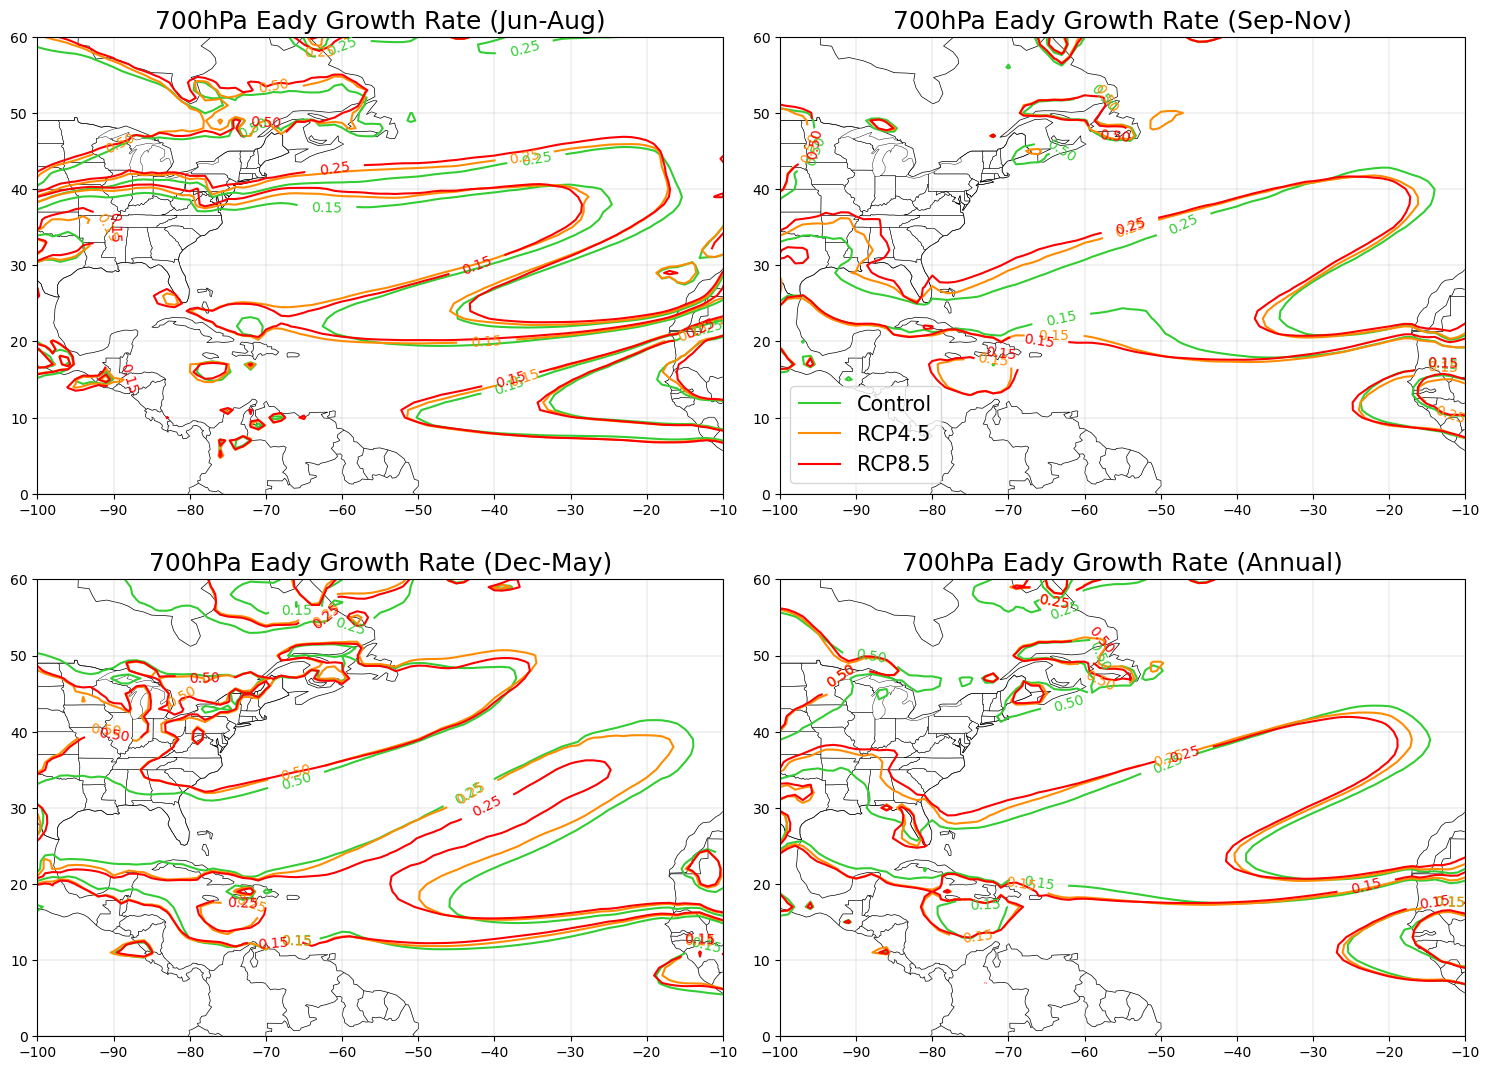

In [46]:
# Plot 700hPa Eady Growth Rate
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May', 'Annual']
Plevs = 70000
Bounds = Eady_Lines_Bounds
Label = '700hPa Eady Growth Rate'
Savefig = True
Figname = 'Eady_700hPa_Seasons_Lines.png'
Eady_Contour_Line(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Plevs, \
Bounds, Label, Savefig, Figname)

In [25]:
# Plot 500hPa Eady Growth Rate
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Plev = 50000
Bounds, Colours = Eady_Bounds, Eady_Colours
Diff_Bounds, Diff_Colours = Eady_Diff_Bounds, Eady_Diff_Colours
Label, Label_Unit = '500hPa Eady Growth Rate', '($ day ^{-1} $)'
Diff_Plot = False
Savefig = True
Figname = 'Eady_500hPa_Seasons.png'
Eady_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Label_Unit, Diff_Plot, Savefig, Figname)

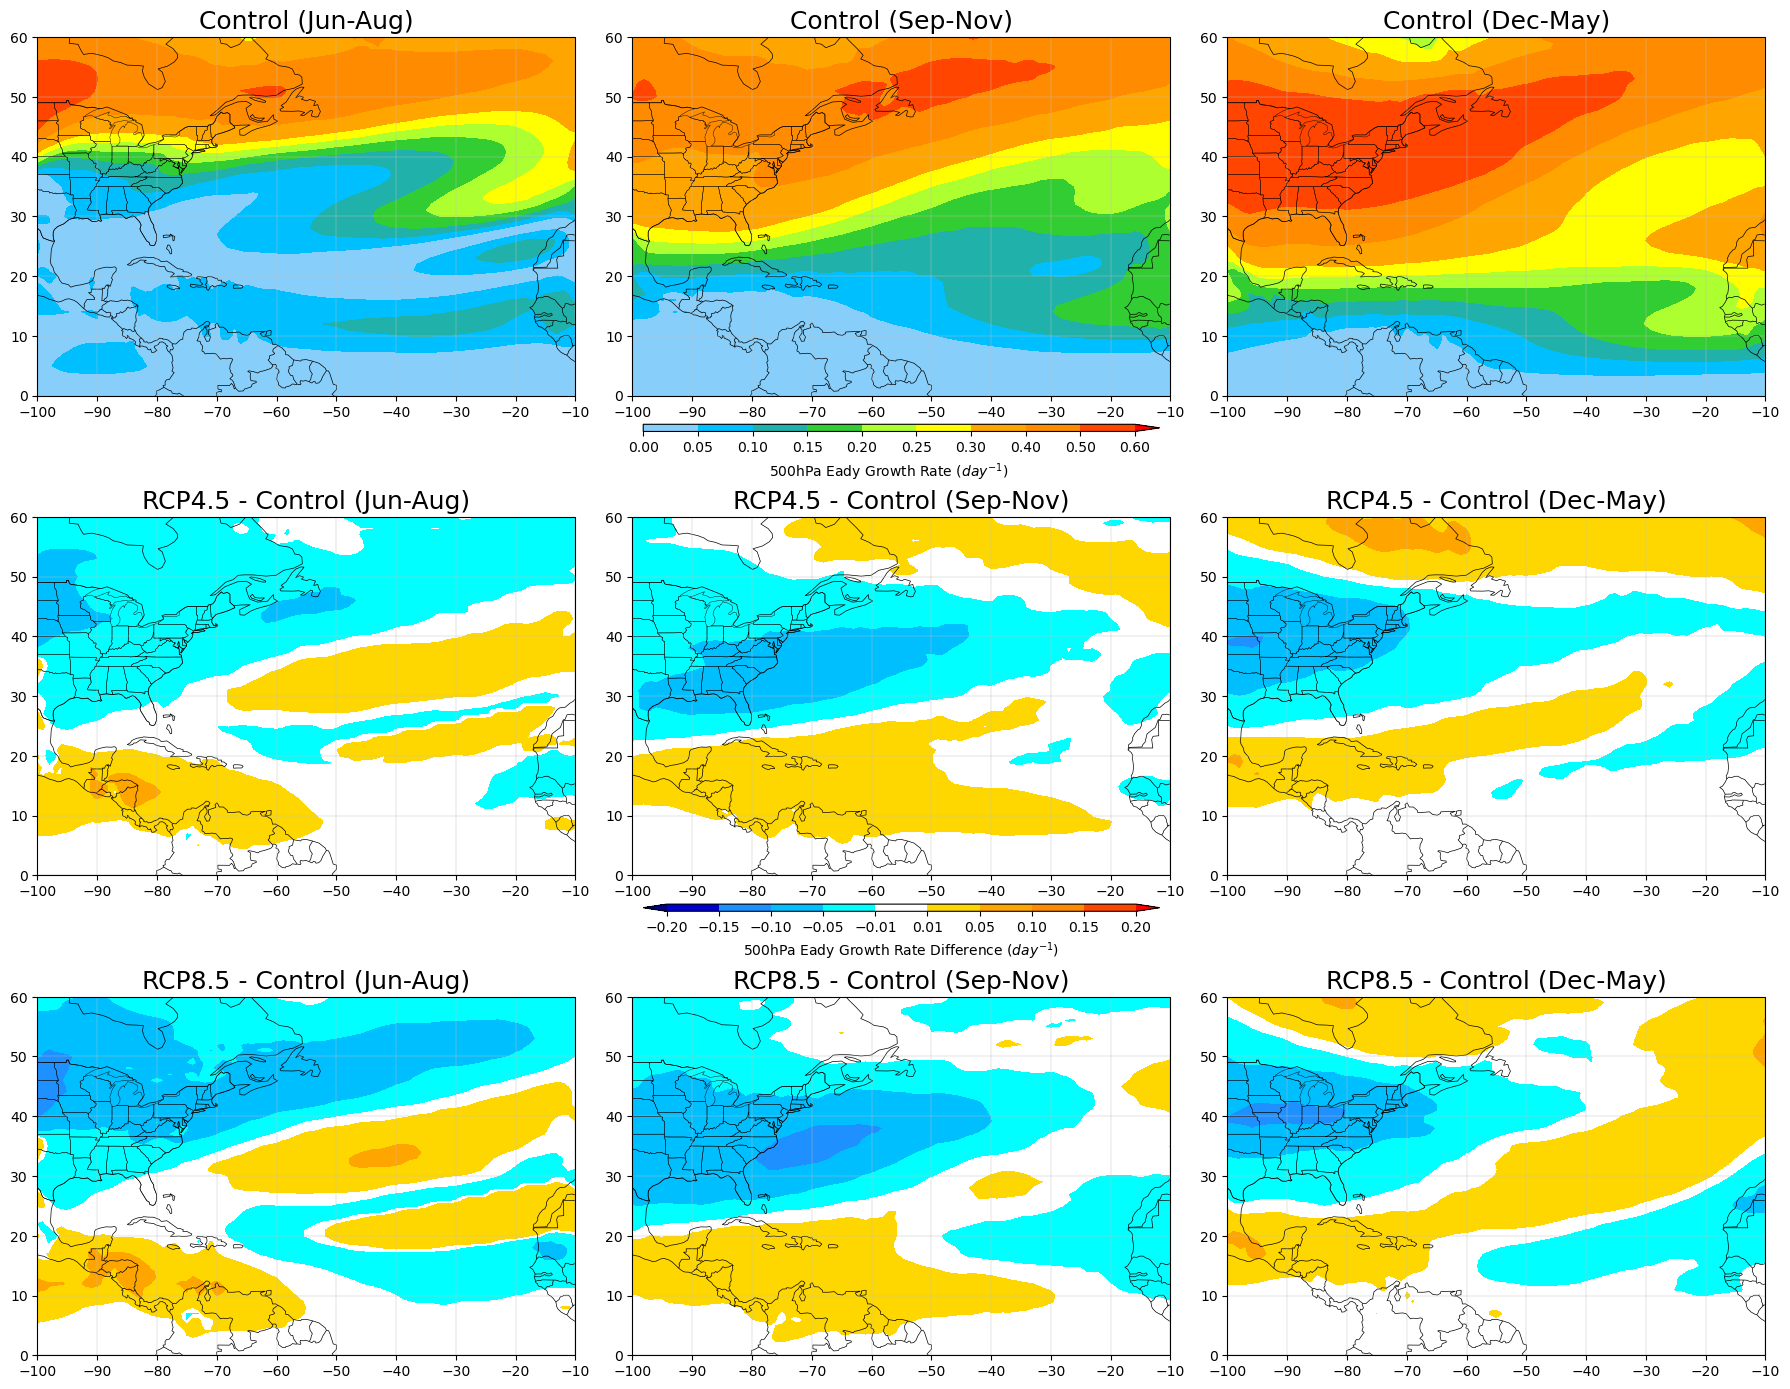

In [26]:
# Plot 500hPa Eady Growth Rate Difference
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Plev = 50000
Bounds, Colours = Eady_Bounds, Eady_Colours
Diff_Bounds, Diff_Colours = Eady_Diff_Bounds, Eady_Diff_Colours
Label, Label_Unit = '500hPa Eady Growth Rate', '($ day ^{-1} $)'
Diff_Plot = True
Savefig = True
Figname = 'Eady_500hPa_Seasons_Diff.png'
Eady_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Label_Unit, Diff_Plot, Savefig, Figname)

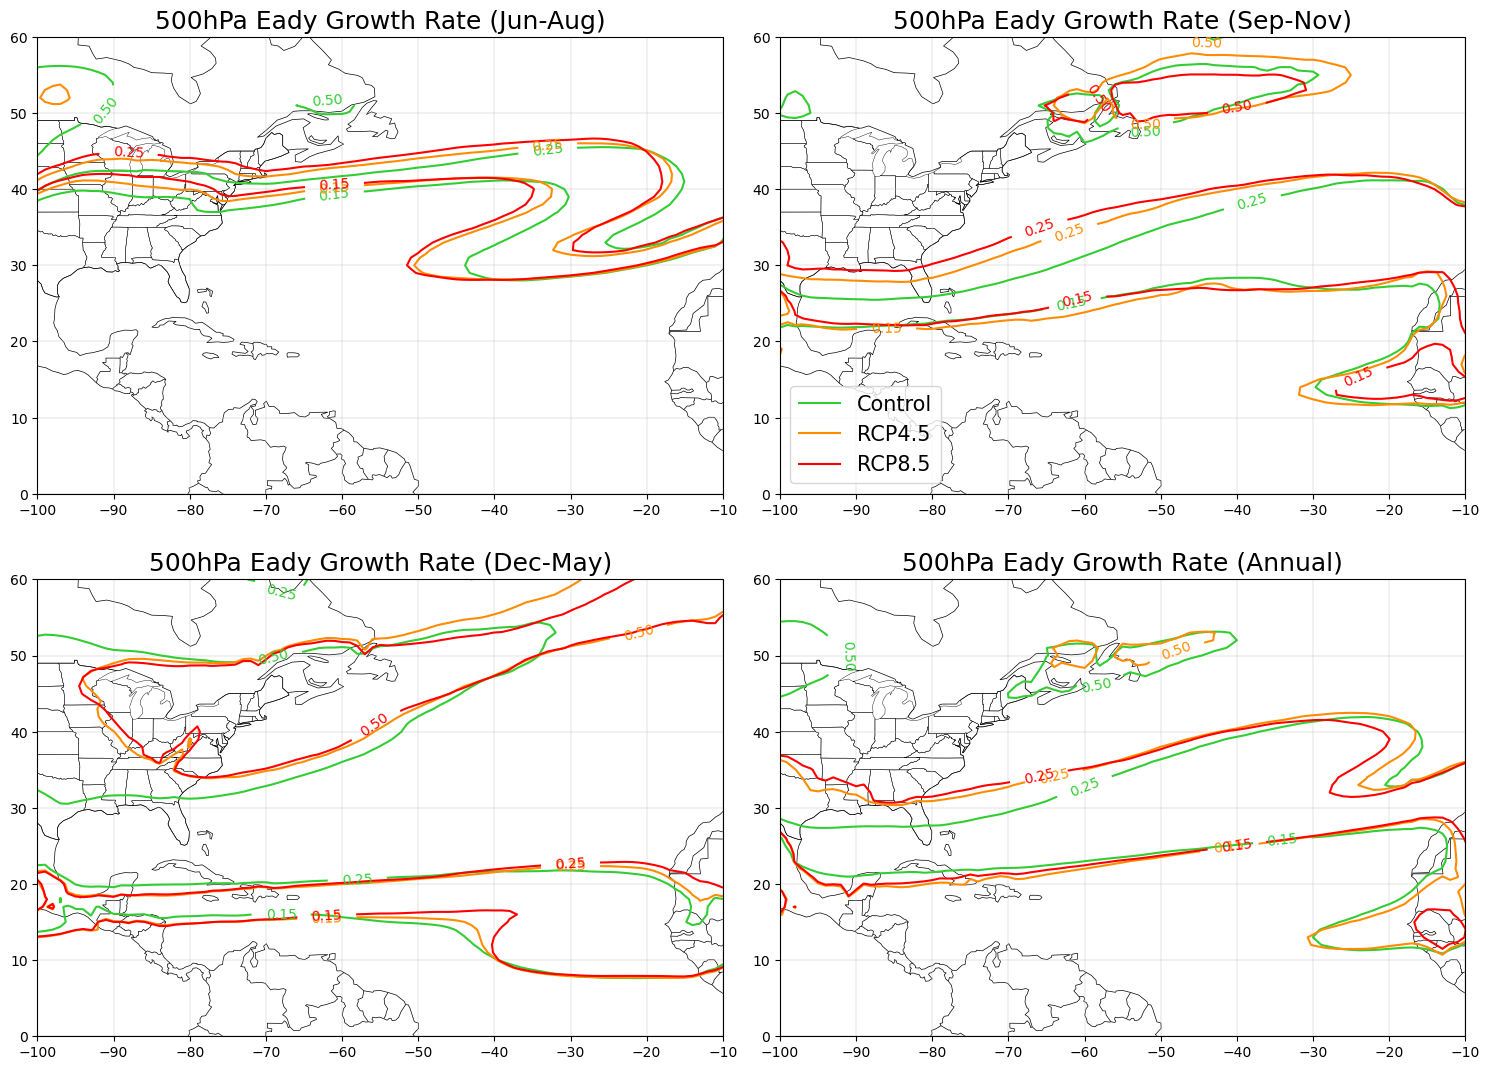

In [47]:
# Plot 500hPa Eady Growth Rate
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May', 'Annual']
Plevs = 50000
Bounds = Eady_Lines_Bounds
Label = '500hPa Eady Growth Rate'
Savefig = True
Figname = 'Eady_500hPa_Seasons_Lines.png'
Eady_Contour_Line(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Plevs, \
Bounds, Label, Savefig, Figname)

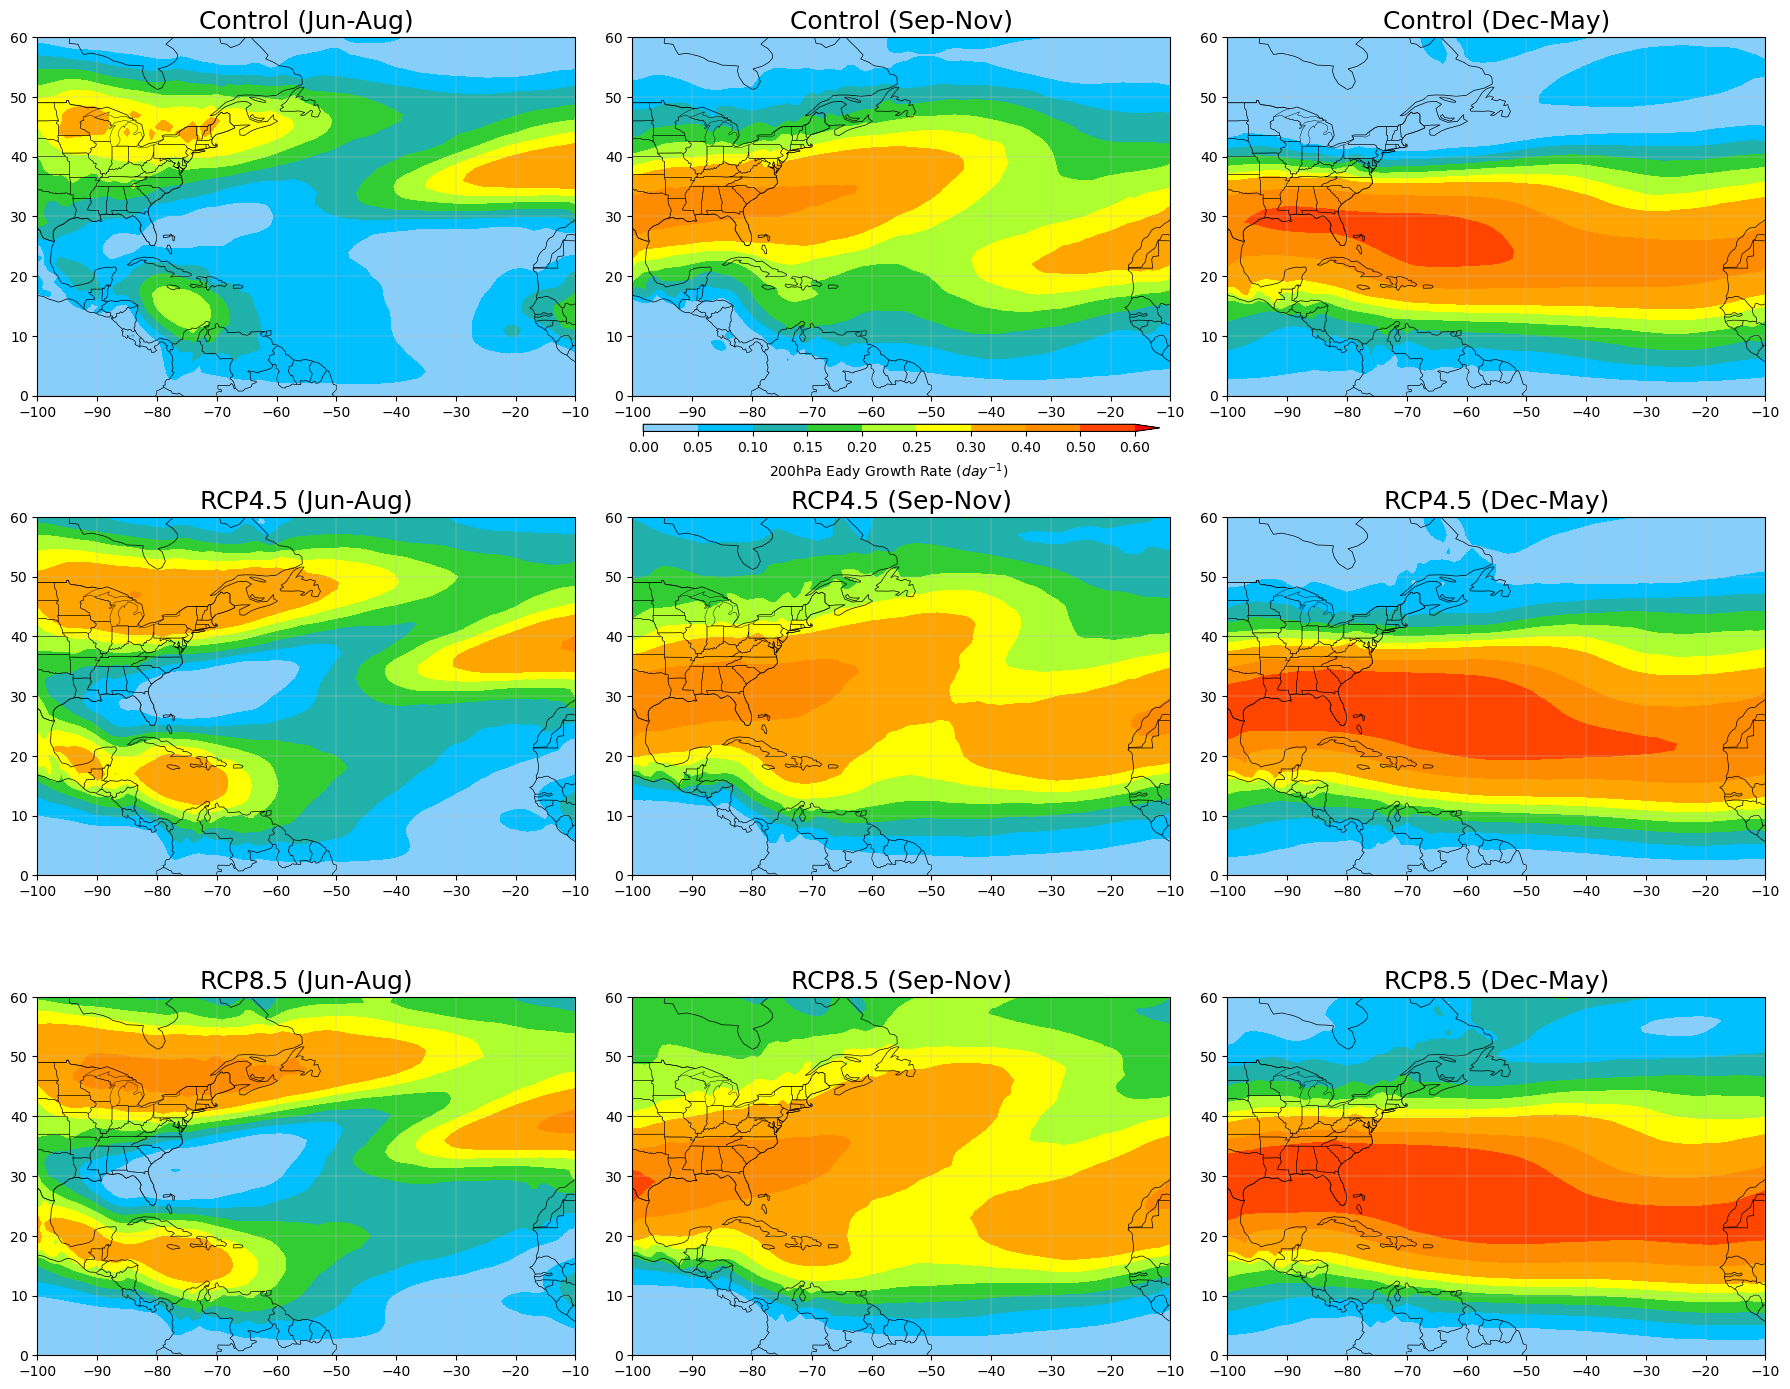

In [28]:
# Plot 200hPa Eady Growth Rate
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Plev = 20000
Bounds, Colours = Eady_Bounds, Eady_Colours
Diff_Bounds, Diff_Colours = Eady_Diff_Bounds, Eady_Diff_Colours
Label, Label_Unit = '200hPa Eady Growth Rate', '($ day ^{-1} $)'
Diff_Plot = False
Savefig = True
Figname = 'Eady_200hPa_Seasons.png'
Eady_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Label_Unit, Diff_Plot, Savefig, Figname)

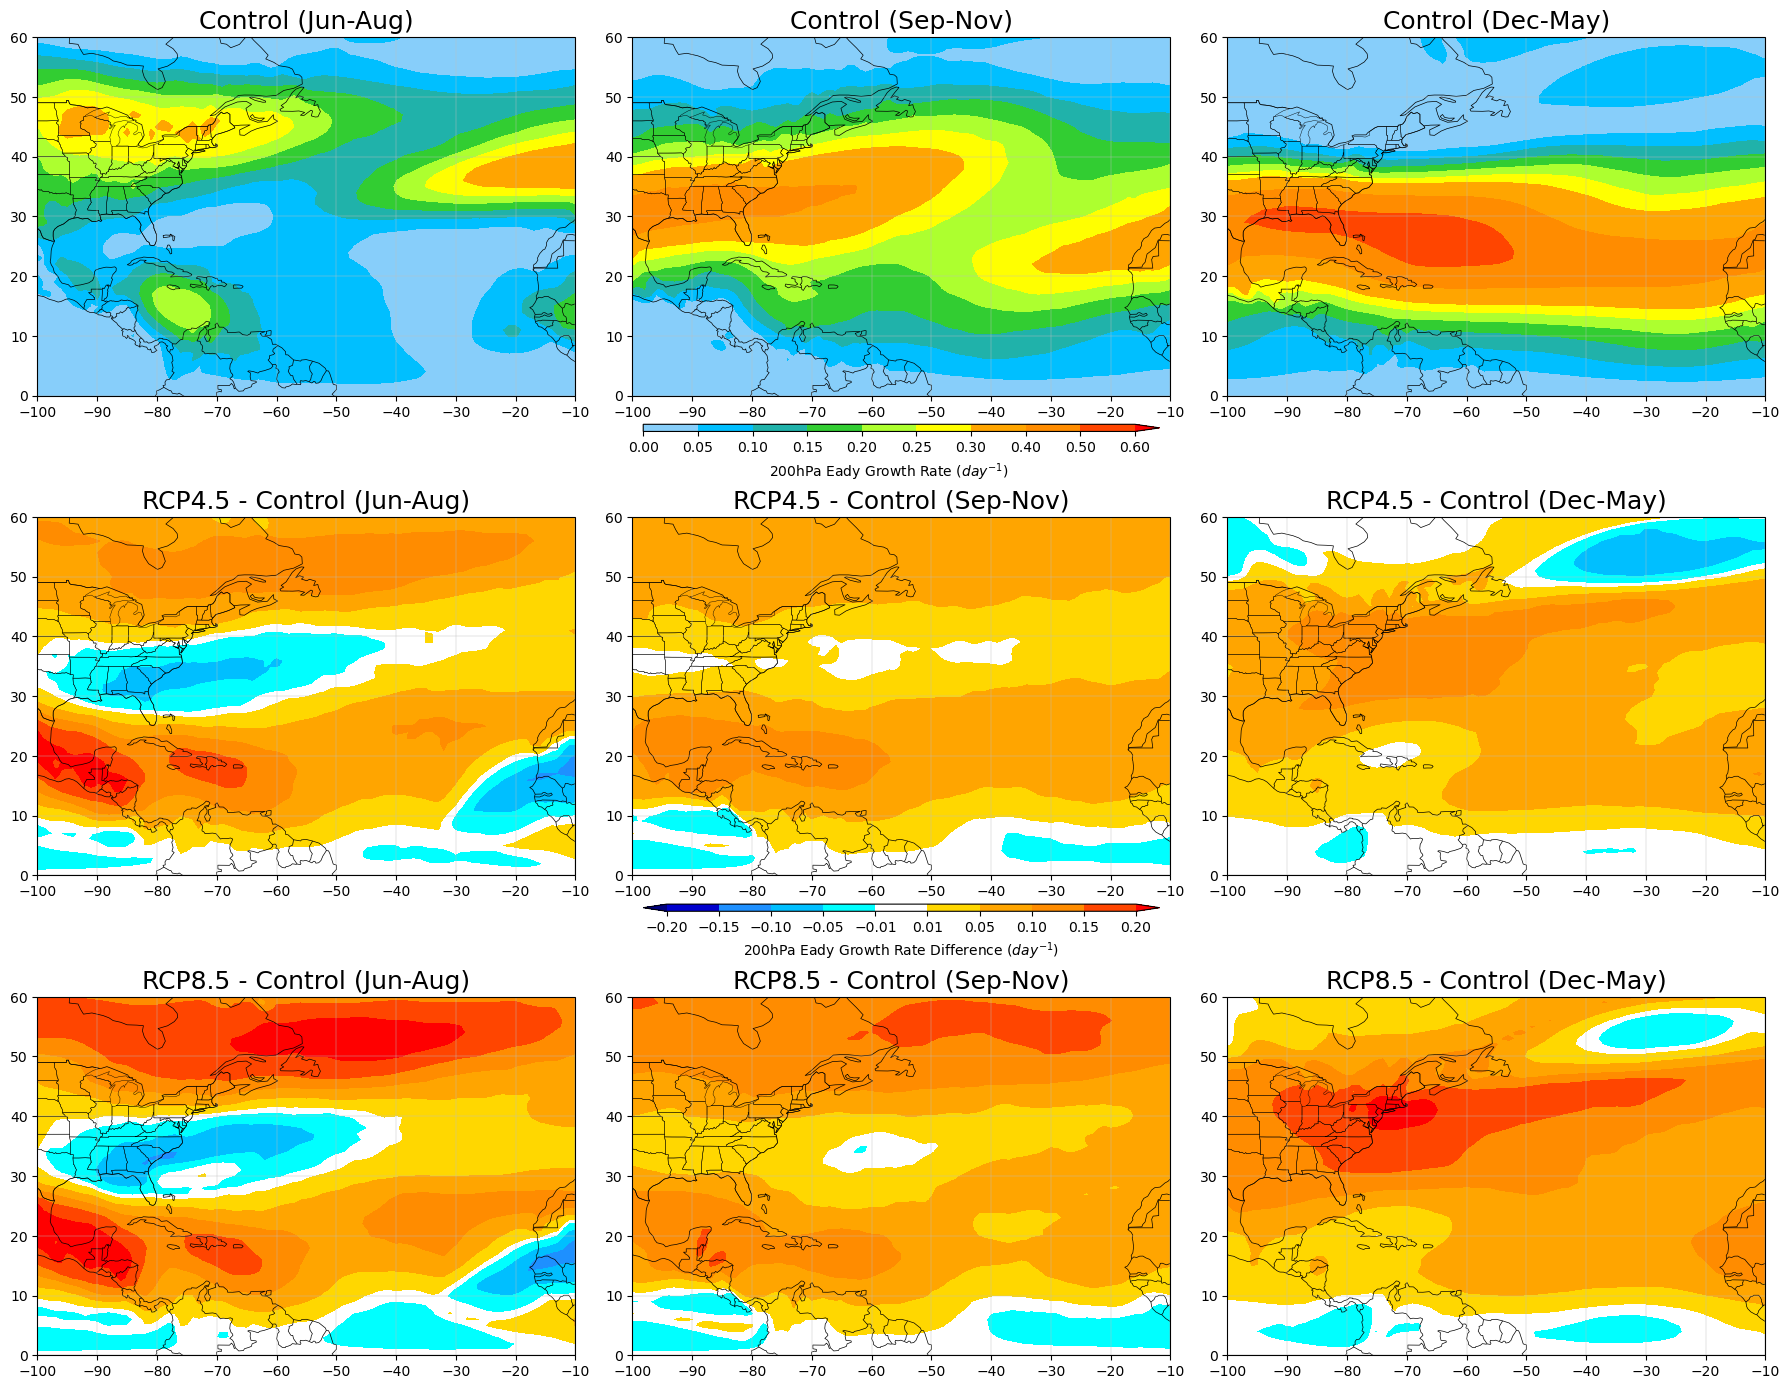

In [29]:
# Plot 200hPa Eady Growth Rate Difference
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Plev = 20000
Bounds, Colours = Eady_Bounds, Eady_Colours
Diff_Bounds, Diff_Colours = Eady_Diff_Bounds, Eady_Diff_Colours
Label, Label_Unit = '200hPa Eady Growth Rate', '($ day ^{-1} $)'
Diff_Plot = True
Savefig = True
Figname = 'Eady_200hPa_Seasons_Diff.png'
Eady_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Label_Unit, Diff_Plot, Savefig, Figname)

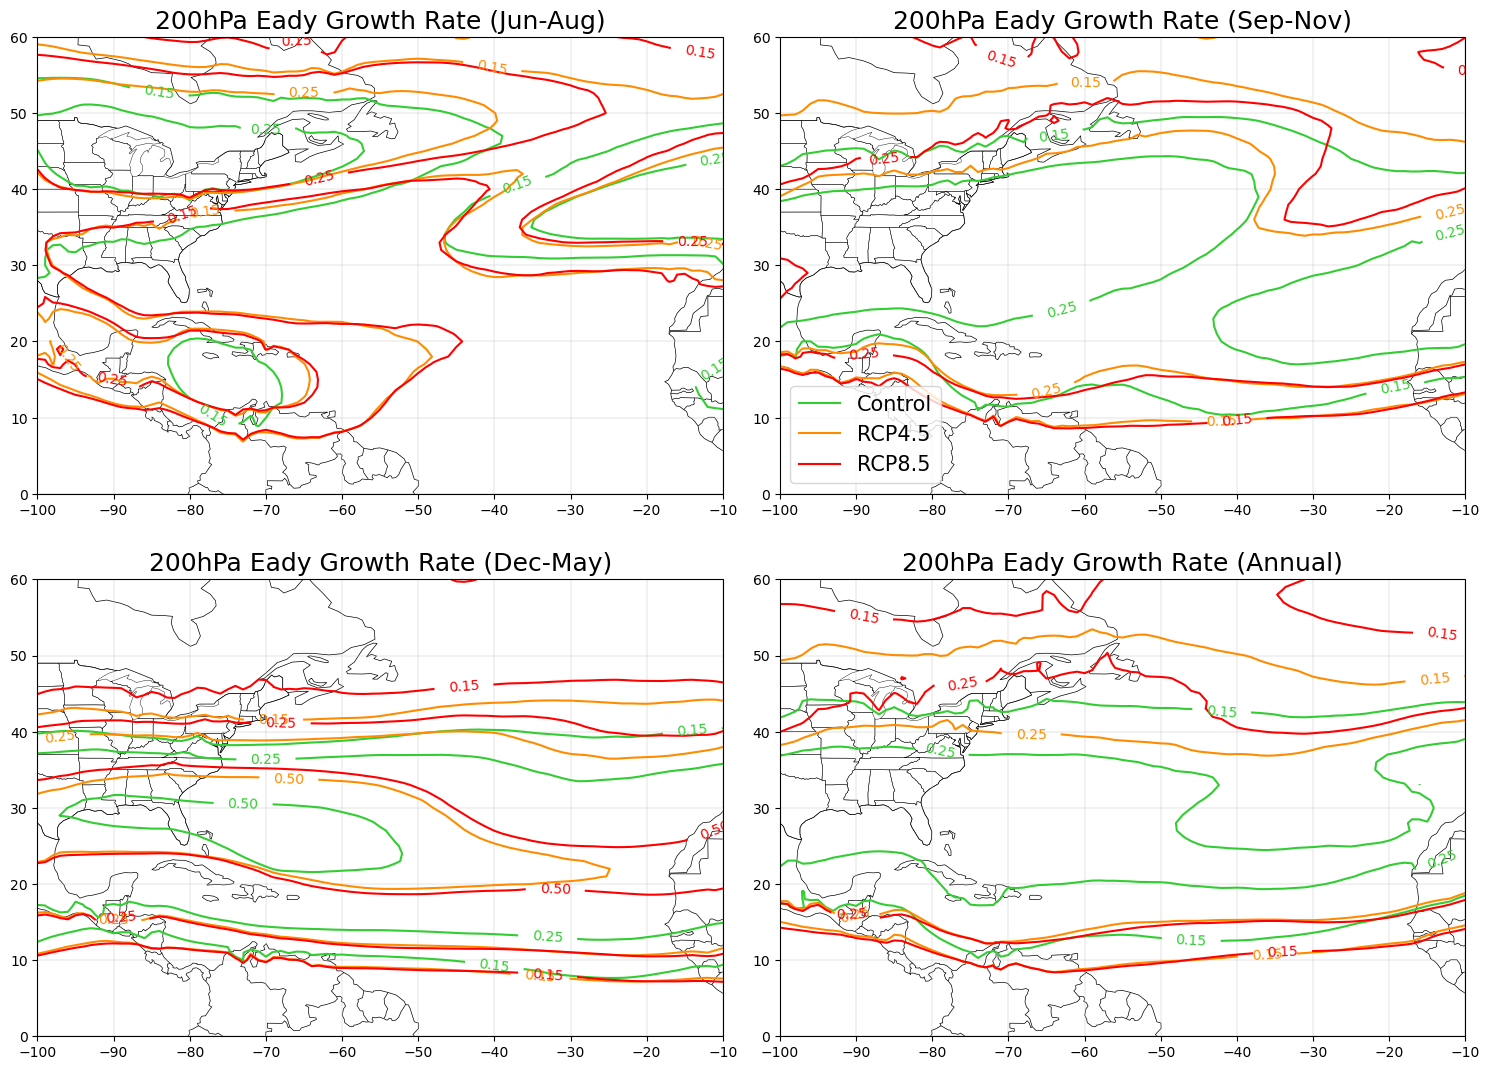

In [48]:
# Plot 200hPa Eady Growth Rate
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May', 'Annual']
Plevs = 20000
Bounds = Eady_Lines_Bounds
Label = '200hPa Eady Growth Rate'
Savefig = True
Figname = 'Eady_200hPa_Seasons_Lines.png'
Eady_Contour_Line(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Plevs, \
Bounds, Label, Savefig, Figname)